In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Importing Liabraries

In [ ]:
!pip install tensorflow opencv-python matplotlib scikit-learn

## Data Collection

In [ ]:
import os
import cv2
import numpy as np
import pandas as pd

 # Path to the images folder
categories = ['Overweld', 'Porosity','Undercut', 'Underfilled']

# Initialize lists to hold the images and labels
images = []
labels = []

In [ ]:
import os
import cv2
import numpy as np

# Define your paths
original_images_path = '/content/drive/MyDrive/Defects_welding/Combined'
categories = [ 'Overweld', 'Porosity','Undercut', 'Underfilled']
label_map = {0: 'Overweld', 1: 'Porosity', 2: 'Undercut', 3: 'Underfilled'}

# Initialize lists to hold the original and augmented images and labels
original_images = []
original_labels = []

# Load original images and labels
for category in categories:
    category_path = os.path.join(original_images_path, category)
    label = list(label_map.keys())[list(label_map.values()).index(category)]

    for img_name in os.listdir(category_path):
        img_path = os.path.join(category_path, img_name)
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.resize(img, (224, 224))  # Resize to match model input
            original_images.append(img)
            original_labels.append(label)

# Convert to numpy arrays
combined_images = np.array(original_images)
combined_labels = np.array(original_labels)

# Print combined dataset size
print(f"Combined dataset size: {len(combined_images)} images")
print(f"Combined labels size: {len(combined_labels)} labels")

Combined dataset size: 1570 images
Combined labels size: 1570 labels


In [ ]:
image = np.array(combined_images)
label = np.array(combined_labels)

# Create a DataFrame for easy manipulation
data = pd.DataFrame({'image': list(image), 'label': label})

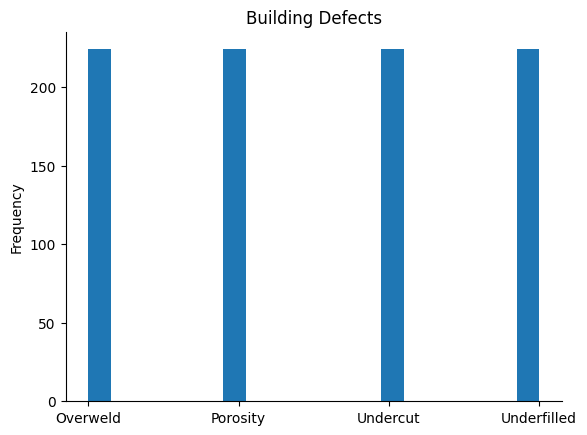

In [ ]:
from matplotlib import pyplot as plt
categories = ['Overweld', 'Porosity', 'Undercut', 'Underfilled']
label_map = {0: 'Overweld', 1: 'Porosity', 2: 'Undercut', 3: 'Underfilled'}

# Plot the histogram
data['label'].plot(kind='hist', bins=20,title='Building Defects')
plt.gca().spines[['top', 'right']].set_visible(False)

# Set the x-axis tick labels to category names
plt.xticks(ticks=range(len(categories)), labels=categories)

# Show the plot
plt.show()

In [ ]:
# Count occurrences of each label
label_counts = data['label'].value_counts()
print(label_counts)
print("------------------")
print(label_map)

label
0    224
1    224
2    224
3    224
Name: count, dtype: int64
------------------
{0: 'Overweld', 1: 'Porosity', 2: 'Undercut', 3: 'Underfilled'}


In [ ]:
combined_images.shape

(896, 224, 224, 3)

In [ ]:
combined_labels.shape

(896,)

In [ ]:
print(len(combined_images), len(combined_labels))

896 896


## Split the Data

In [ ]:
from sklearn.model_selection import train_test_split

# Split combined dataset into training (70%), validation (20%), and test (10%)
X_train_val, X_test, y_train_val, y_test = train_test_split(combined_images, combined_labels, test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

# Print sizes of the splits
print(f"Training dataset size: {len(X_train)} images")
print(f"Validation dataset size: {len(X_val)} images")
print(f"Test dataset size: {len(X_test)} images")

Training dataset size: 1130 images
Validation dataset size: 283 images
Test dataset size: 157 images


In [ ]:
print(f"Train/Val size: {len(X_train_val)}, Test size: {len(X_test)}")
print(f"Train size: {len(X_train)}, Val size: {len(X_val)}")

Train/Val size: 1413, Test size: 157
Train size: 1130, Val size: 283


In [ ]:
print(X_train[0])

[[[132 114 127]
  [139 121 134]
  [147 129 142]
  ...
  [136 102 108]
  [115  81  87]
  [100  66  72]]

 [[133 115 128]
  [135 117 130]
  [137 119 132]
  ...
  [127  93  99]
  [ 95  61  67]
  [ 97  63  69]]

 [[145 127 140]
  [141 123 136]
  [135 117 130]
  ...
  [113  79  85]
  [ 85  51  57]
  [107  73  79]]

 ...

 [[ 96  74  76]
  [116  94  96]
  [126 104 106]
  ...
  [ 81  37  44]
  [ 85  41  48]
  [ 89  45  52]]

 [[104  82  84]
  [124 102 104]
  [118  96  98]
  ...
  [ 78  34  41]
  [ 81  37  44]
  [ 85  41  48]]

 [[111  89  91]
  [128 106 108]
  [110  88  90]
  ...
  [ 77  33  40]
  [ 80  36  43]
  [ 84  40  47]]]


## Data Preprocessing

In [ ]:
# Normalize images
X_train = X_train.astype('float32') / 255.0
X_val = X_val.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0


In [ ]:
# One-hot encode the labels
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
y_train = to_categorical(y_train, num_classes=4)
y_val = to_categorical(y_val, num_classes=4)
y_test = to_categorical(y_test, num_classes=4)


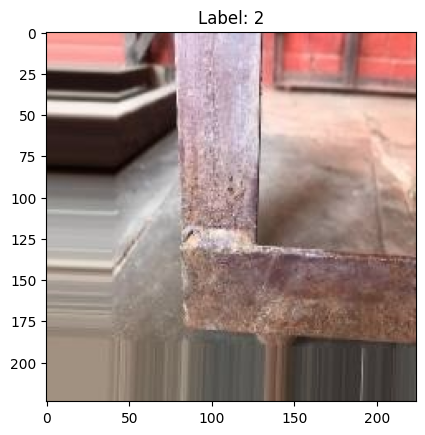

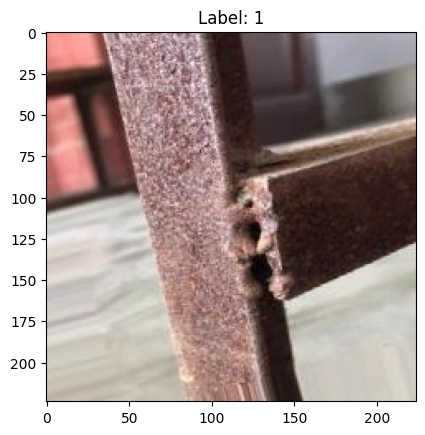

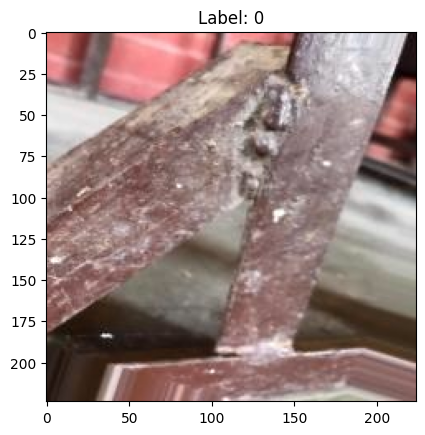

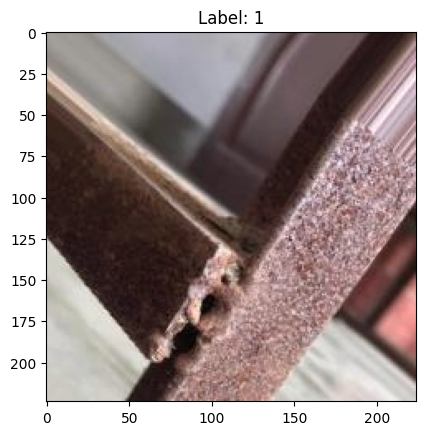

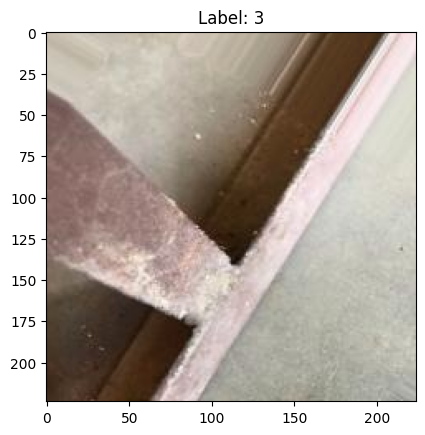

In [ ]:
import matplotlib.pyplot as plt

# Display a few training images
for i in range(5):
    plt.imshow(X_train[i])
    plt.title(f"Label: {y_train[i]}")
    plt.show()

## Model Training

# Explainable AI

## SHAP

In [ ]:
!pip install shap lime opencv-python matplotlib pillow

In [ ]:
from tensorflow.keras.models import load_model

model = load_model('/content/densenet_defect_classifier (7).h5')
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ zero_padding2d_2          │ (None, 230, 230, 3)    │              0 │ input_layer_2[0][0]    │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,408 │ zero_padding2d_2[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ zero_padding2d_3          │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1 (MaxPooling2D)      │ (None, 56, 56, 64)     │              0 │ zero_padding2d_3[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_bn         │ (None, 56, 56, 64)     │            256 │ pool1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_0_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 128)    │          8,192 │ conv2_block1_0_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 128)    │            512 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 128)    │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 32)     │         36,864 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_concat       │ (None, 56, 56, 96)     │              0 │ pool1[0][0],           │
│ (Concatenate)             │                        │                │ conv2_block1_2_conv[0… │
├──────────────────────

 Total params: 8,091,206 (30.87 MB)

 Trainable params: 1,053,700 (4.02 MB)

 Non-trainable params: 7,037,504 (26.85 MB)

 Optimizer params: 2 (12.00 B)

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def load_images(img_paths):
    images = []
    for path in img_paths:
        img = cv2.imread(path)
        img = cv2.resize(img, (224, 224))
        img = img / 255.0  # Normalize
        images.append(img)
    return np.array(images)

img_paths = ['/content/WhatsApp Image 2025-02-11 at 17.38.47_fb82cdc9.jpg']  # Add more as needed
X_sample = load_images(img_paths)

In [ ]:
!pip install --upgrade shap

In [ ]:
print("Input image shape:", img_array.shape)
print("Background shape:", background.shape)
print("Background single image shape:", X_train[0].shape)


Input image shape: (1, 224, 224, 3)
Background shape: (10, 224, 224, 3)
Background single image shape: (224, 224, 3)


In [ ]:
import cv2
import numpy as np
import shap
import matplotlib.pyplot as plt

# Load and normalize input image
img_path = '/content/13_Overweld.jpg' # Add more as needed

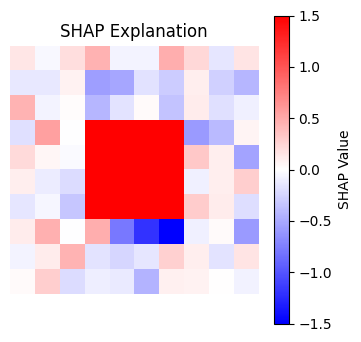

In [ ]:
import shap
import numpy as np

# Loop through each image in the batch
for i in range(len(shap_values.values)):
    # Extract SHAP values for the i-th image in the batch
    shap_values_array = shap_values.values[i]  # Shape: (height, width, channels)

    # Sum or average across color channels to get a single value per pixel
    shap_values_2d = np.sum(shap_values_array, axis=2)  # or np.mean(...)

    # Visualize using shap.image_plot (2D SHAP values + Original image)
    shap.image_plot([shap_values_2d], pixel_values=X_sample[i])

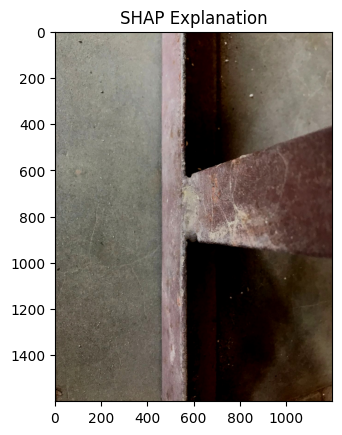

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg # Import the necessary module

img_path = "/content/augmented_aug_3_60_augmented_aug_3_117_IMG-20240305-WA0101.jpg"

# Read the image data using mpimg.imread
img = mpimg.imread(img_path)

plt.imshow(img)
plt.title("SHAP Explanation")
plt.show() # Add plt.show() to display the plot

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer: 2it [02:43, 163.45s/it]              


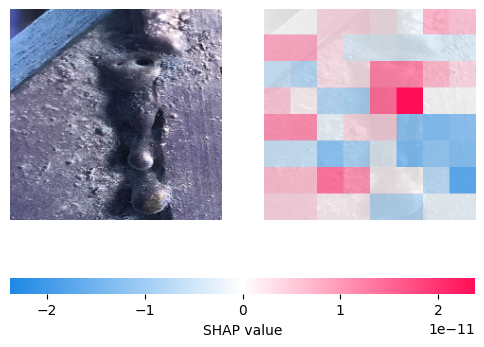

In [ ]:
import shap
import numpy as np
img_paths = ['/content/augmented_aug_3_60_augmented_aug_3_117_IMG-20240305-WA0101.jpg']  # Add more as needed

# Load the images into an array
X_sample = load_images(img_paths)

img = cv2.imread(img_path)
img = cv2.resize(img, (224, 224))

# Normalize the image if necessary
img_array = np.expand_dims(img, axis=0) / 255.0

# Get background (for SHAP, you can average 10 images as you suggested)
background_images = np.random.randn(10, 224, 224, 3)  # Replace with actual background images
background_avg = np.mean(background_images, axis=0)

# Initialize the Image masker by passing the actual background image (not just the shape)
masker = shap.maskers.Image(mask_value=background_avg)

# Initialize the SHAP explainer with the background
explainer = shap.Explainer(model, masker)

# Calculate SHAP values for the image
shap_values = explainer(img_array)

# Loop through each image in the batch
for i in range(len(shap_values.values)):
    # Extract SHAP values for the i-th image in the batch
    shap_values_array = shap_values.values[i]  # Shape: (height, width, channels)

    # Sum or average across color channels to get a single value per pixel
    shap_values_2d = np.sum(shap_values_array, axis=2)

    # Visualize using shap.image_plot (2D SHAP values + Original image)
    shap.image_plot([shap_values_2d], pixel_values=X_sample[i])

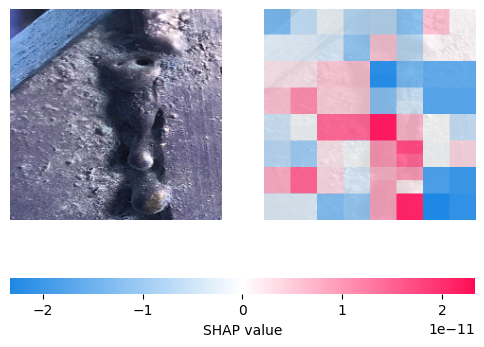

In [ ]:
import shap
import numpy as np  # Import numpy if you haven't already

# Access the values array from the Explanation object
shap_values_array = shap_values.values

# Assuming shap_values_array is a 5-dimensional array (batch, height, width, channels, classes)
# Average or sum the SHAP values across channels to get a single value for each pixel
shap_values_2d = np.sum(shap_values_array[0], axis=2)  # Summing across channels (axis 2)

# Now, plot using the 2D SHAP values and the original image
shap.image_plot(shap_values_2d, pixel_values=X_sample[0])

## GRAD- CAM

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import image

# Function to preprocess the image (resize, normalize, etc.)
def preprocess_image(img_path, target_size=(224, 224)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array / 255.0  # Normalize
    return img_array

def get_gradcam_heatmap(model, img_array, last_conv_layer_name='conv5_block16_concat', pred_index=None):
    # Create a model that maps the input image to the activations of the last conv layer & predictions
    grad_model = tf.keras.models.Model(
        inputs=model.input,
        outputs=[model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Forward pass + Gradient Calculation
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)  # img_array is passed here
        if pred_index is None:
            pred_index = tf.argmax(predictions[0])  # Get the index of the most probable class
        loss = predictions[:, pred_index]

    # Compute gradients
    grads = tape.gradient(loss, conv_outputs)

    # Pool gradients across spatial dimensions
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # Get the output feature map
    conv_outputs = conv_outputs[0]

    # Weight each channel by corresponding gradients
    heatmap = tf.reduce_sum(conv_outputs * pooled_grads, axis=-1)

    # Apply ReLU and normalize
    heatmap = tf.maximum(heatmap, 0) / tf.reduce_max(heatmap)

    return heatmap.numpy(), predictions[0]

categories = {0: "Overweld", 1:"Porosity", 2: "Undercut", 3: "Underfilled"}

def display_gradcam(img_path, model, last_conv_layer_name='conv5_block16_concat'):
    img_array = preprocess_image(img_path)

    # Generate the Grad-CAM heatmap and prediction
    heatmap, prediction = get_gradcam_heatmap(model, img_array, last_conv_layer_name)
        # Load and prepare the original image for overlay
    img = cv2.imread(img_path)
    img = cv2.resize(img, (224, 224))  # Resize to match the input size of the model
    img = np.array(img)

    # First, display the real image
    plt.figure(figsize=(8,6))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title('Original Image')
    plt.show()

    # Resize the heatmap to match the original image size
    heatmap_resized = cv2.resize(heatmap, (224, 224))
    heatmap_resized = np.uint8(255 * heatmap_resized)

    # Create a color gradient for heatmap visualization (Red, Yellow, Green, Blue)
    heatmap_colored = cv2.applyColorMap(heatmap_resized, cv2.COLORMAP_JET)
    overlayed_img = cv2.addWeighted(img, 0.6, heatmap_colored, 0.4, 0)

    # Display the overlay image
    plt.figure(figsize=(8,6))
    plt.imshow(cv2.cvtColor(overlayed_img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title('Overlay Image')
    predicted_class = np.argmax(prediction)
    prediction_class_name = categories[predicted_class]
    confidence = prediction[predicted_class] * 100
    plt.title(f"Predicted Class: {prediction_class_name}, Confidence: {confidence:.2f}%")

    # Show the heatmap as a pixel box with the red color indicating important features
    plt.figure(figsize=(8, 6))
    plt.imshow(cv2.cvtColor(heatmap_colored, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title("Grad-CAM Heatmap")
    plt.show()

    # Display the classification result
    predicted_class = np.argmax(prediction)
    prediction_class_name = categories[predicted_class]
    confidence = prediction[predicted_class] * 100
    print(f"Predicted Class: {prediction_class_name}, Confidence: {confidence:.2f}%")


In [ ]:

def gridget_gradcam_heatmap(model, img_array, last_conv_layer_name='conv5_block16_concat', pred_index=None):
    # Create a model that maps the input image to the activations of the last conv layer & predictions
    grad_model = tf.keras.models.Model(
        inputs=model.input,
        outputs=[model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Forward pass + Gradient Calculation
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array) # img_array is passed here
        if pred_index is None:
            pred_index = tf.argmax(predictions[0])
        loss = predictions[:, pred_index]

    # Compute gradients
    grads = tape.gradient(loss, conv_outputs)

    # Pool gradients across spatial dimensions
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # Get the output feature map
    conv_outputs = conv_outputs[0]

    # Weight each channel by corresponding gradients
    heatmap = tf.reduce_sum(conv_outputs * pooled_grads, axis=-1)

    # Apply ReLU and normalize
    heatmap = tf.maximum(heatmap, 0) / tf.reduce_max(heatmap)

    return heatmap.numpy()


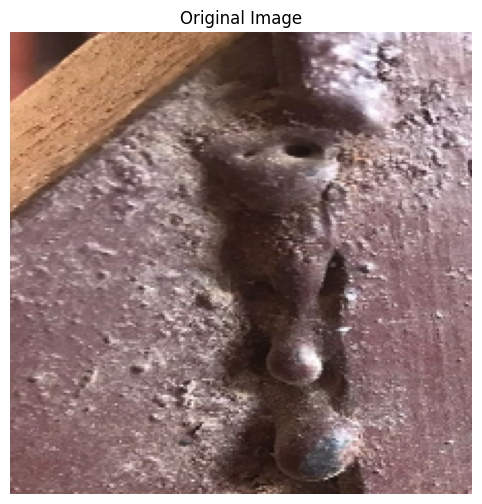

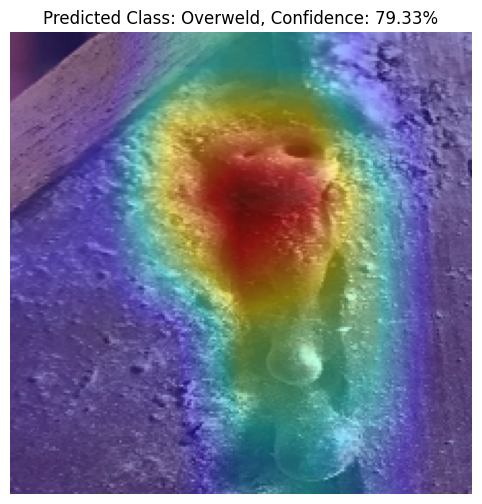

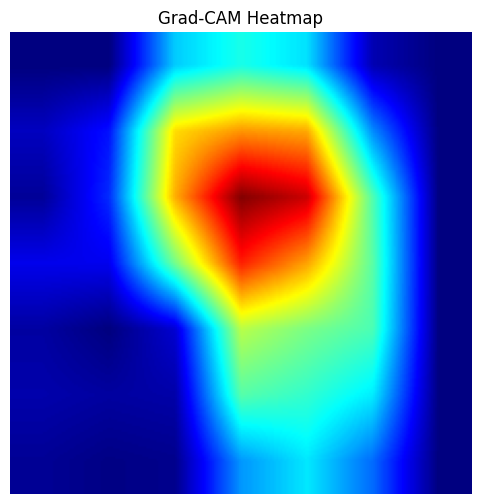

Predicted Class: Overweld, Confidence: 79.33%


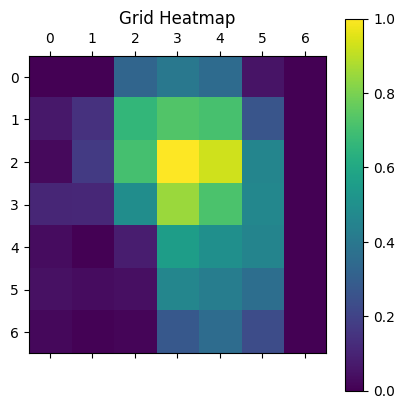

In [ ]:
# Example usage: Load and preprocess your image first
img_path = '/content/13_Overweld.jpg'   # Path to your image
display_gradcam(img_path, model)  # Pass the pre-trained model here
# Update to the path of your image file
img_array = preprocess_image(img_path) # Use preprocess_image function to load image as numpy array

# Then generate the heatmap
heatmap = gridget_gradcam_heatmap(model, img_array)  # You can specify `last_conv_layer_name` if using other DenseNet versions

# Display heatmap
plt.matshow(heatmap)
plt.title('Grid Heatmap')
plt.colorbar()
plt.show()

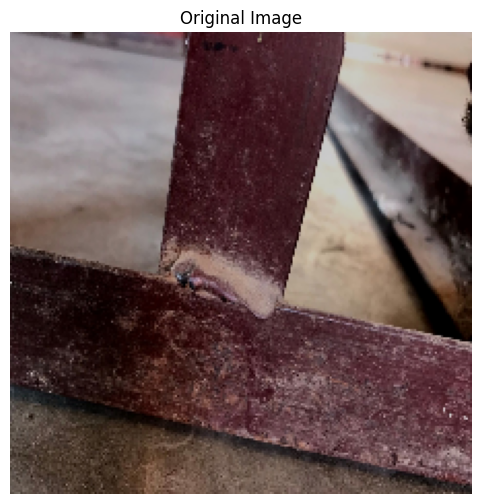

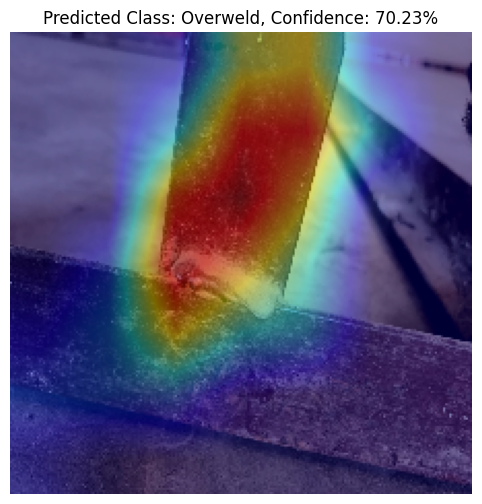

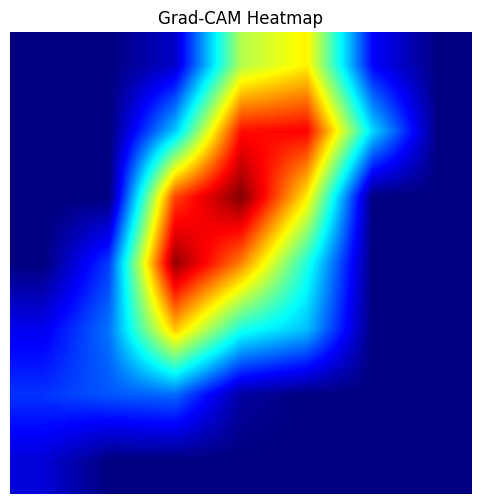

Predicted Class: Overweld, Confidence: 70.23%


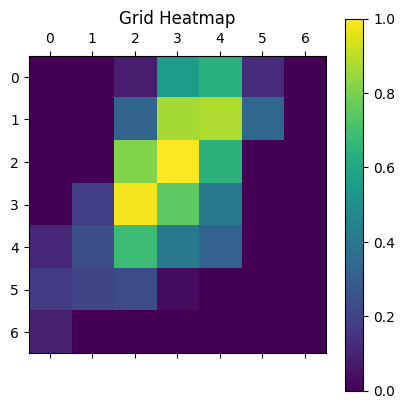

In [ ]:
# Example usage: Load and preprocess your image first
img_path = '/content/augmented_aug_2_29_augmented_aug_2_117_IMG-20240305-WA0075.jpg'   # Path to your image
display_gradcam(img_path, model)  # Pass the pre-trained model here
# Update to the path of your image file
img_array = preprocess_image(img_path) # Use preprocess_image function to load image as numpy array

# Then generate the heatmap
heatmap = gridget_gradcam_heatmap(model, img_array)  # You can specify `last_conv_layer_name` if using other DenseNet versions

# Display heatmap
plt.matshow(heatmap)
plt.title('Grid Heatmap')
plt.colorbar()
plt.show()

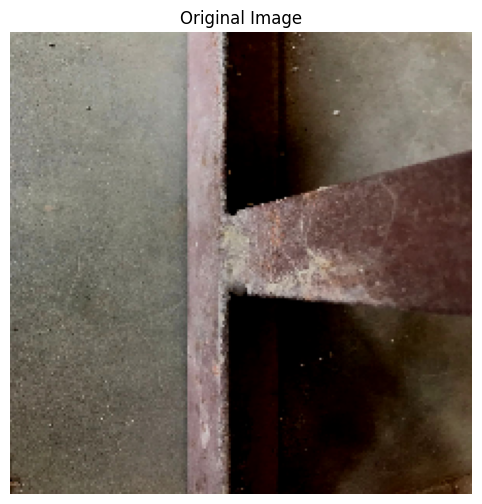

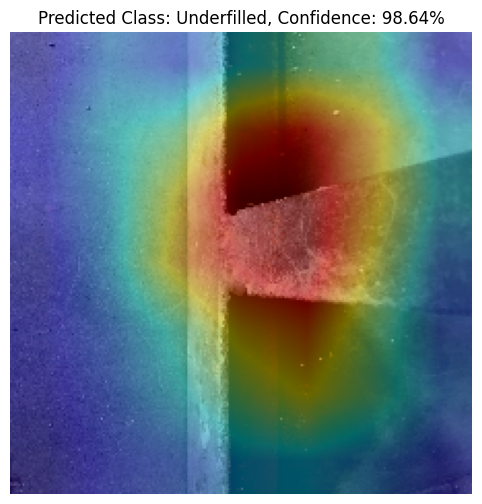

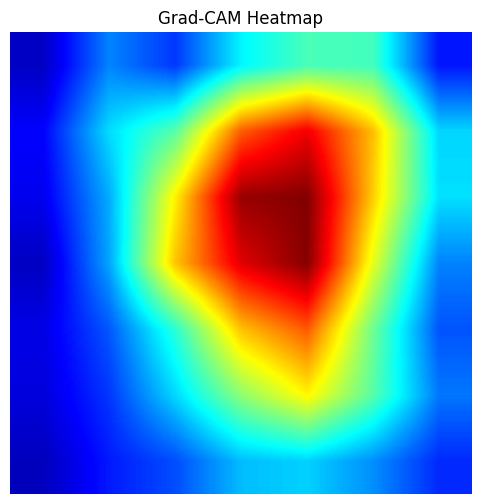

Predicted Class: Underfilled, Confidence: 98.64%


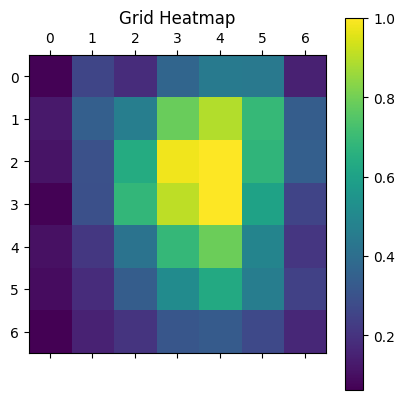

In [ ]:

# Example usage: Load and preprocess your image first
img_path = '/content/augmented_aug_3_60_augmented_aug_3_117_IMG-20240305-WA0101.jpg'   # Path to your image
display_gradcam(img_path, model)  # Pass the pre-trained model here
# Update to the path of your image file
img_array = preprocess_image(img_path) # Use preprocess_image function to load image as numpy array

# Then generate the heatmap
heatmap = gridget_gradcam_heatmap(model, img_array)  # You can specify `last_conv_layer_name` if using other DenseNet versions

# Display heatmap
plt.matshow(heatmap)
plt.title('Grid Heatmap')
plt.colorbar()
plt.show()


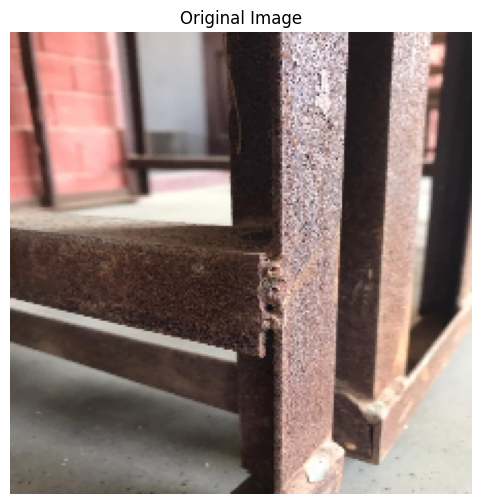

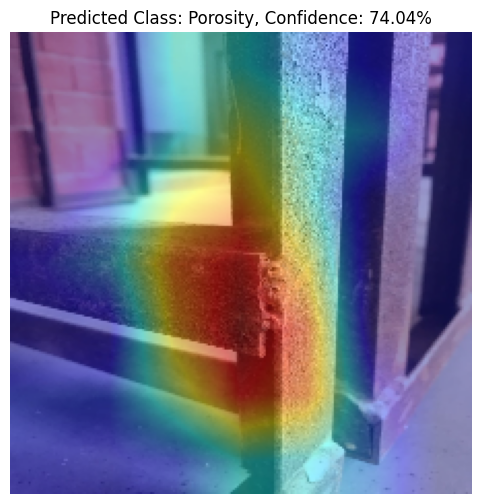

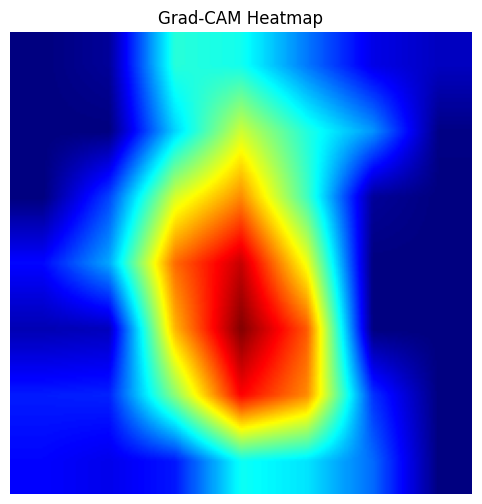

Predicted Class: Porosity, Confidence: 74.04%


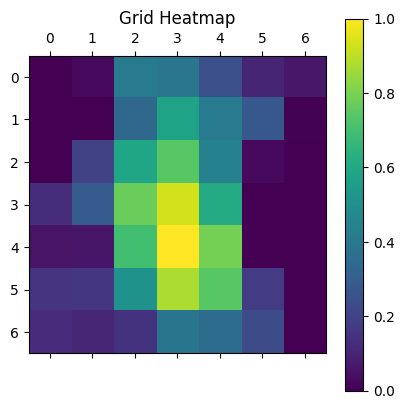

In [ ]:
# Example usage: Load and preprocess your image first
img_path = '/content/augmented_aug_0_24_augmented_aug_0_108_IMG-20240305-WA0042.jpg'   # Path to your image
display_gradcam(img_path, model)  # Pass the pre-trained model here
# Update to the path of your image file
img_array = preprocess_image(img_path) # Use preprocess_image function to load image as numpy array

# Then generate the heatmap
heatmap = gridget_gradcam_heatmap(model, img_array)  # You can specify `last_conv_layer_name` if using other DenseNet versions

# Display heatmap
plt.matshow(heatmap)
plt.title('Grid Heatmap')
plt.colorbar()
plt.show()

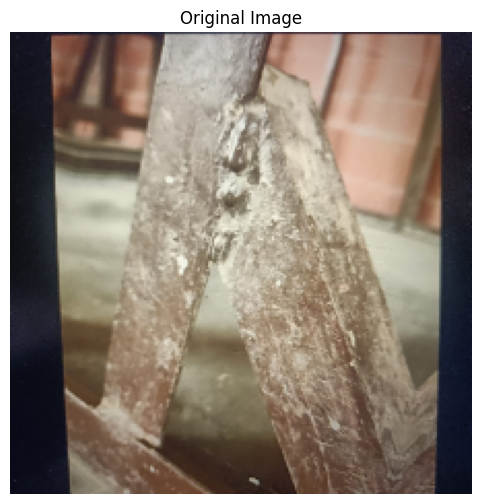

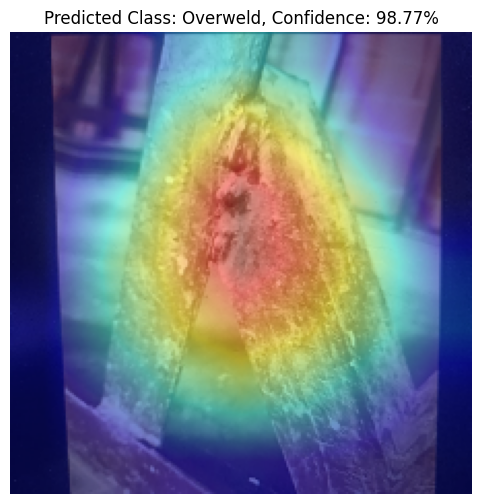

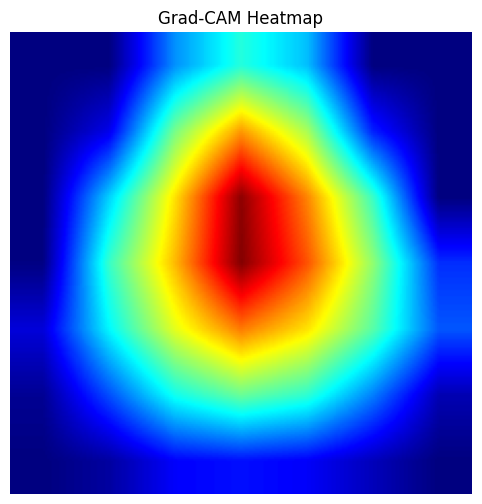

Predicted Class: Overweld, Confidence: 98.77%


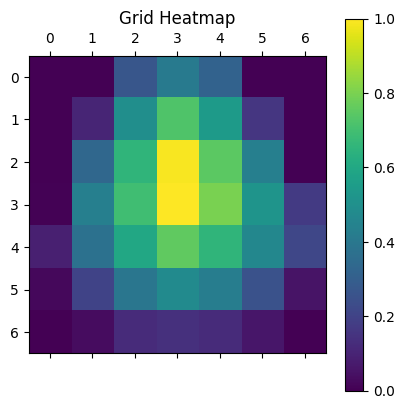

In [ ]:
# Example usage: Load and preprocess your image first
img_path = '/content/WhatsApp Image 2025-02-11 at 17.38.46_5ba57003.jpg'   # Path to your image
display_gradcam(img_path, model)  # Pass the pre-trained model here
# Update to the path of your image file
img_array = preprocess_image(img_path) # Use preprocess_image function to load image as numpy array

# Then generate the heatmap
heatmap = gridget_gradcam_heatmap(model, img_array)  # You can specify `last_conv_layer_name` if using other DenseNet versions

# Display heatmap
plt.matshow(heatmap)
plt.title('Grid Heatmap')
plt.colorbar()
plt.show()

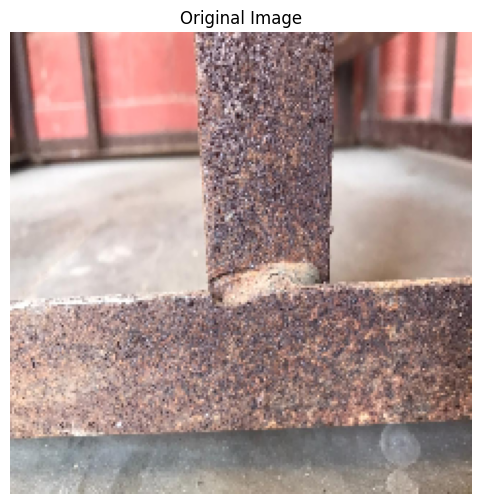

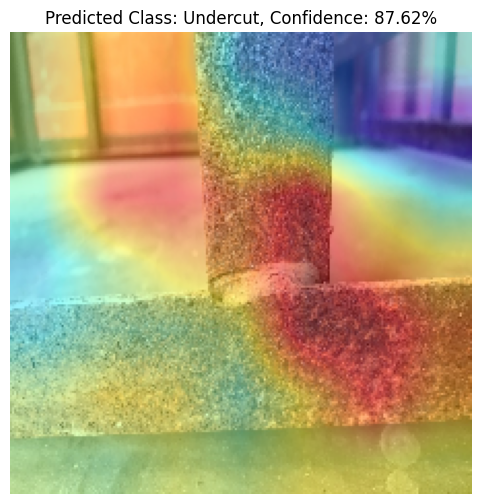

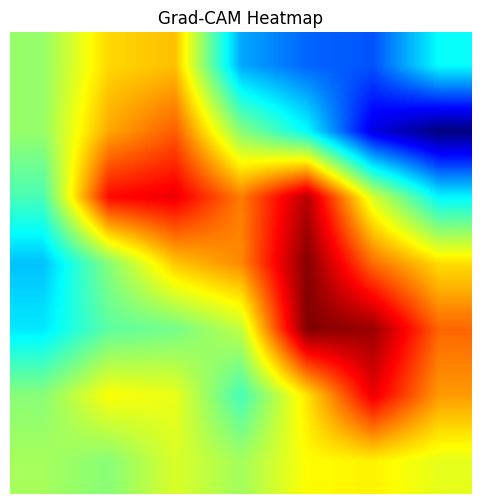

Predicted Class: Undercut, Confidence: 87.62%


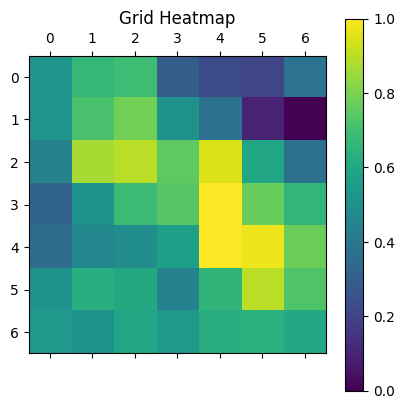

In [ ]:
# Example usage: Load and preprocess your image first
img_path = '/content/IMG-20240305-WA0043.jpg'   # Path to your image
display_gradcam(img_path, model)  # Pass the pre-trained model here
# Update to the path of your image file
img_array = preprocess_image(img_path) # Use preprocess_image function to load image as numpy array

# Then generate the heatmap
heatmap = gridget_gradcam_heatmap(model, img_array)  # You can specify `last_conv_layer_name` if using other DenseNet versions

# Display heatmap
plt.matshow(heatmap)
plt.title('Grid Heatmap')
plt.colorbar()
plt.show()

## LIME

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━

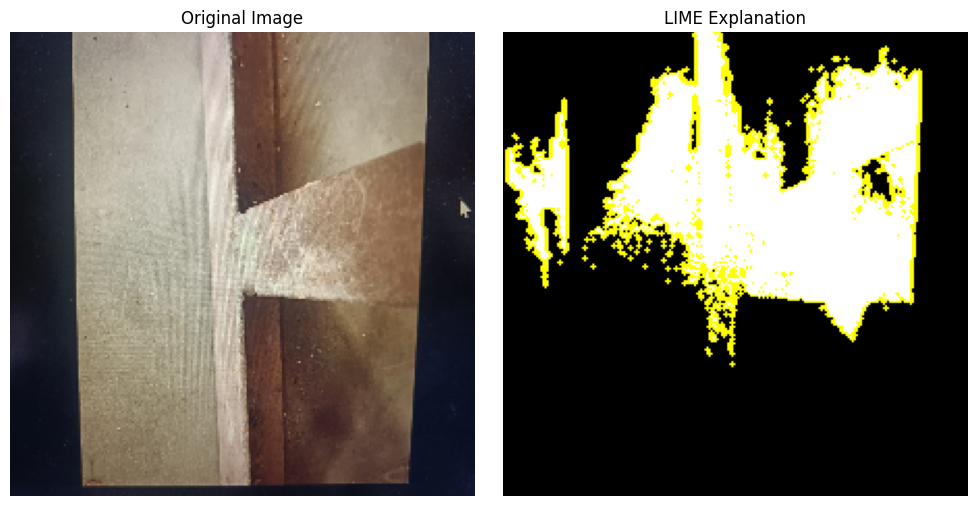

In [ ]:
from lime import lime_image
from skimage.segmentation import mark_boundaries
import matplotlib.pyplot as plt
import cv2
import numpy as np

explainer = lime_image.LimeImageExplainer()

def model_predict(images):
    """
    Predict the class of an input image using a pre-trained model.
    """
    images = np.array(images) / 255.0  # Normalize
    return model.predict(images)

# Load and preprocess image
img = cv2.imread('/content/WhatsApp Image 2025-02-11 at 17.38.47_fb82cdc9.jpg')
img = cv2.resize(img, (224, 224))
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Get LIME explanation
explanation = explainer.explain_instance(
    img.astype('double'),
    model_predict,
    top_labels=1,
    hide_color=0,
    num_samples=1000
)

# Extract LIME mask
temp, mask = explanation.get_image_and_mask(
    label=explanation.top_labels[0],
    positive_only=True,
    num_features=10,
    hide_rest=True
)

# Plot original image and LIME explanation side by side
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Original image
ax[0].imshow(img_rgb)
ax[0].set_title("Original Image")
ax[0].axis('off')

# LIME Explanation with mask overlay
ax[1].imshow(mark_boundaries(temp, mask))
ax[1].set_title("LIME Explanation")
ax[1].axis('off')

plt.tight_layout()
plt.show()


In [ ]:
from lime import lime_image
from skimage.segmentation import mark_boundaries
import matplotlib.pyplot as plt
import cv2
import numpy as np

explainer = lime_image.LimeImageExplainer()

def model_predict(images):
    images = images / 255.0  # Normalize if needed
    return model.predict(images)

def explain_with_lime(img_path, class_labels):
    # Load image
    img = cv2.imread(img_path)
    img = cv2.resize(img, (224, 224))

    # Predict class
    img_array = np.expand_dims(img, axis=0)
    predictions = model_predict(img_array)
    predicted_class = np.argmax(predictions[0])
    predicted_label = class_labels[predicted_class]

    print(f"Predicted Class: {predicted_class} → {predicted_label}")

    # Get LIME explanation
    explanation = explainer.explain_instance(
        img.astype('double'),
        model_predict,
        top_labels=1,
        hide_color=0,
        num_samples=1000
    )

    # Visualize LIME Explanation
    temp, mask = explanation.get_image_and_mask(
        explanation.top_labels[0],
        positive_only=True,
        num_features=10,
        hide_rest=True
    )

    # Show the original image & LIME explanation
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title("Original Image")

    plt.subplot(1, 2, 2)
    plt.imshow(mark_boundaries(temp, mask))
    plt.title(f"LIME Explanation: {predicted_label}")

    plt.show()


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

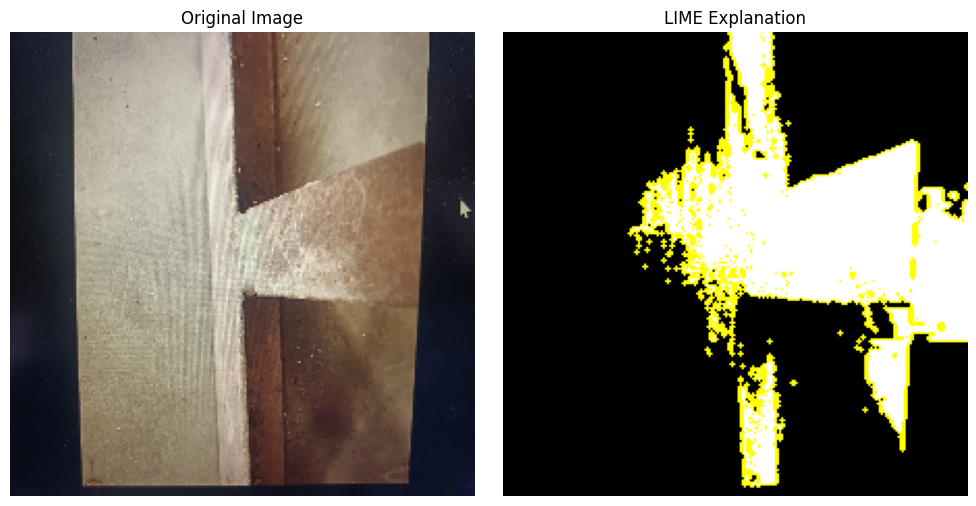

In [ ]:
from lime import lime_image
from skimage.segmentation import mark_boundaries
import matplotlib.pyplot as plt
import cv2
import numpy as np

explainer = lime_image.LimeImageExplainer()

def model_predict(images):
    """
    Predict the class of an input image using a pre-trained model.
    """
    images = np.array(images) / 255.0  # Normalize
    return model.predict(images)

# Load and preprocess image
img = cv2.imread('/content/WhatsApp Image 2025-02-11 at 17.38.47_fb82cdc9.jpg')
img = cv2.resize(img, (224, 224))
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Get LIME explanation
explanation = explainer.explain_instance(
    img.astype('double'),
    model_predict,
    top_labels=1,
    hide_color=0,
    num_samples=1000
)

# Extract LIME mask
temp, mask = explanation.get_image_and_mask(
    label=explanation.top_labels[0],
    positive_only=True,
    num_features=10,
    hide_rest=True
)

# Plot original image and LIME explanation side by side
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Original image
ax[0].imshow(img_rgb)
ax[0].set_title("Original Image")
ax[0].axis('off')

# LIME Explanation with mask overlay
ax[1].imshow(mark_boundaries(temp, mask))
ax[1].set_title("LIME Explanation")
ax[1].axis('off')

plt.tight_layout()
plt.show()


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

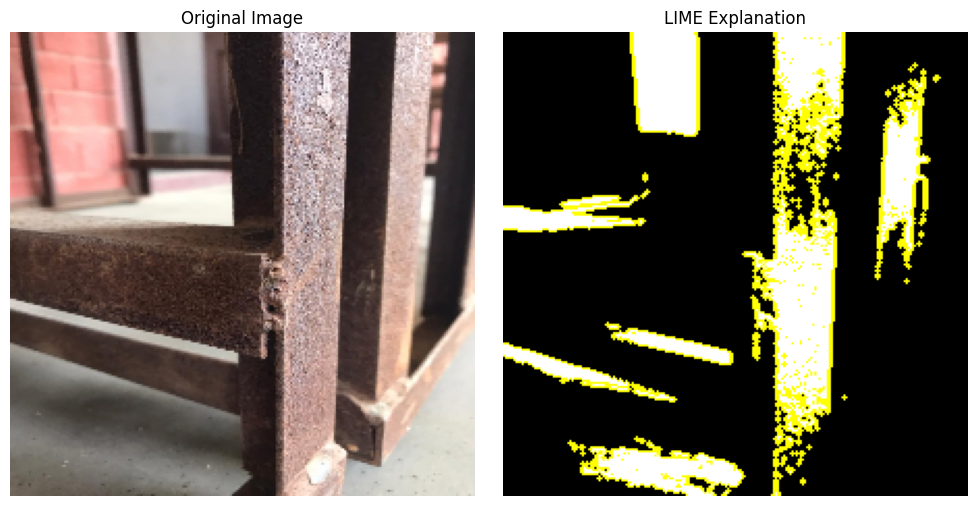

In [ ]:
# Load and preprocess image
img = cv2.imread('/content/augmented_aug_0_24_augmented_aug_0_108_IMG-20240305-WA0042.jpg')
img = cv2.resize(img, (224, 224))
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


# Get LIME explanation
explanation = explainer.explain_instance(
    img.astype('double'),
    model_predict,
    top_labels=1,
    hide_color=0,
    num_samples=1000
)

# Extract LIME mask
temp, mask = explanation.get_image_and_mask(
    label=explanation.top_labels[0],
    positive_only=True,
    num_features=10,
    hide_rest=True
)

# Plot original image and LIME explanation side by side
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Original image
ax[0].imshow(img_rgb)
ax[0].set_title("Original Image")
ax[0].axis('off')

# LIME Explanation with mask overlay
ax[1].imshow(mark_boundaries(temp, mask))
ax[1].set_title("LIME Explanation")
ax[1].axis('off')

plt.tight_layout()
plt.show()



  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

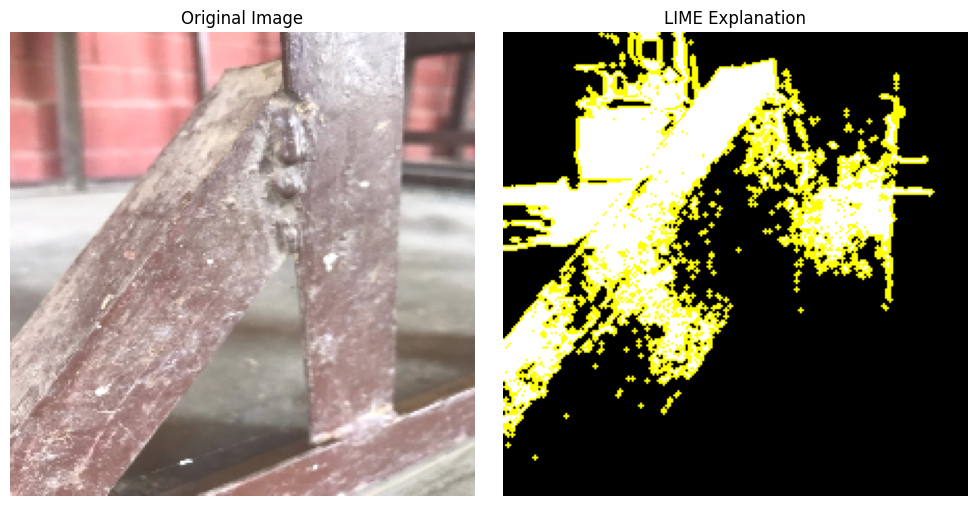

In [ ]:

# Load and preprocess image
img = cv2.imread('/content/augmented_aug_1_17_augmented_aug_1_127_IMG-20240305-WA0073.jpg')
img = cv2.resize(img, (224, 224))
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


# Get LIME explanation
explanation = explainer.explain_instance(
    img.astype('double'),
    model_predict,
    top_labels=1,
    hide_color=0,
    num_samples=1000
)

# Extract LIME mask
temp, mask = explanation.get_image_and_mask(
    label=explanation.top_labels[0],
    positive_only=True,
    num_features=10,
    hide_rest=True
)


# Plot original image and LIME explanation side by side
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Original image
ax[0].imshow(img_rgb)
ax[0].set_title("Original Image")
ax[0].axis('off')

# LIME Explanation with mask overlay
ax[1].imshow(mark_boundaries(temp, mask))
ax[1].set_title("LIME Explanation")
ax[1].axis('off')

plt.tight_layout()
plt.show()